In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./half_cleaned_vehicles.csv")

In [3]:
process_pipeline = []

In [4]:
df.sample(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,type,paint_color,image_url,description,state,lat,long,posting_date,has_VIN
52950,7302020274,https://southbend.craigslist.org/ctd/d/south-b...,south bend / michiana,https://southbend.craigslist.org,9.210240,2012.0,honda,fit,Unknown condition,Unknown Cylinders,...,udt,Unknown Type,black,https://images.craigslist.org/00a0a_duHbI44ROu...,Rightway South Bend address: 50537 State Ro...,in,41.759395,-86.251452,2021-04-05T10:01:02-0400,1
134235,7313707109,https://spokane.craigslist.org/cto/d/greenacre...,spokane / coeur d'alene,https://spokane.craigslist.org,10.308953,2014.0,gmc,sierra 1500,good,8 cylinders,...,4wd,truck,white,https://images.craigslist.org/00N0N_ghaoV9vQZW...,Fantastic truck! Runs drives and operates just...,id,47.643200,-117.158300,2021-04-27T22:19:11-0700,1
84665,7316693102,https://nmi.craigslist.org/ctd/d/flint-2007-do...,northern michigan,https://nmi.craigslist.org,10.043032,2007.0,ram,3500,good,6 cylinders,...,4wd,truck,blue,https://images.craigslist.org/00t0t_bz7qoSQwqF...,2007 Dodge Ram 3500 Laramie Mega Cab 4WD DRW -...,mi,43.050600,-83.615120,2021-05-04T10:14:27-0400,1
210550,7316330567,https://fingerlakes.craigslist.org/ctd/d/union...,finger lakes,https://fingerlakes.craigslist.org,9.392245,2014.0,chevrolet,traverse,good,6 cylinders,...,4wd,SUV,silver,https://images.craigslist.org/00G0G_hAcbBxFXky...,"2014 Chevrolet Traverse LS AWD w/PDC - $11,995...",ny,43.225408,-77.348355,2021-05-03T14:21:35-0400,1
45943,7308399917,https://fredericksburg.craigslist.org/ctd/d/fr...,fredericksburg,https://fredericksburg.craigslist.org,8.889446,2013.0,hyundai,elantra,Unknown condition,Unknown Cylinders,...,udt,sedan,red,https://images.craigslist.org/00y0y_b7xNYtdmIu...,2013 Hyundai Elantra GLS 4dr Sedan 6A Offe...,va,38.270806,-77.495036,2021-04-17T15:01:42-0400,1


In [5]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'drive', 'type', 'paint_color', 'image_url',
       'description', 'state', 'lat', 'long', 'posting_date', 'has_VIN'],
      dtype='object')

In [6]:
#We drop the url columns, assume not much information given by them
def transform1(df):
    df.drop(columns=["url", "region_url", "image_url"], inplace=True)
transform1(df)
process_pipeline.append(transform1)

In [7]:
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'description', 'state', 'lat', 'long',
       'posting_date', 'has_VIN'],
      dtype='object')

## Explore numerical columns

Notice the funny distribution of odometer

<Axes: xlabel='odometer', ylabel='Count'>

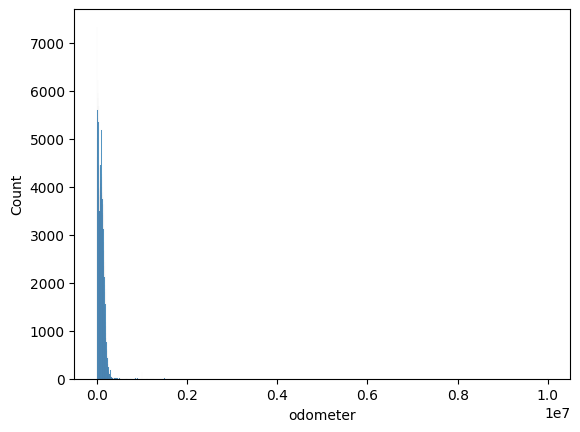

In [8]:
sns.histplot(df['odometer'])

In [9]:
df.describe()

,id,price,year,odometer,lat,long,has_VIN
count,2.670380e+05,267038.000000,267038.000000,2.670380e+05,267038.000000,267038.000000,267038.000000
mean,7.311479e+09,9.595468,2011.357309,9.481119e+04,38.581622,-94.204082,0.661988
std,4.388232e+06,0.837035,9.048098,1.599782e+05,5.823814,18.079598,0.473033
min,7.301583e+09,6.907755,1900.000000,0.000000e+00,-84.122245,-159.719900,0.000000
25%,7.308092e+09,8.987197,2008.000000,3.653100e+04,34.830000,-110.958687,0.000000
50%,7.312596e+09,9.711116,2013.000000,8.467400e+04,39.254962,-87.960000,1.000000
75%,7.315245e+09,10.257659,2017.000000,1.333600e+05,42.356252,-80.640000,1.000000
max,7.317101e+09,16.648724,2022.000000,1.000000e+07,82.252826,173.885502,1.000000


In [10]:
#apply a log
def transform2(df):
    #Drop all 0 values first since it is secondhand it cannot be 0
    df.drop(index=np.where(df['odometer']==0)[0], inplace=True)
    df.reset_index(inplace=True, drop=True)
    df['odometer'] = np.log(df['odometer'])
transform2(df)
process_pipeline.append(transform2)

Text(0.5, 0, 'log_odometer')

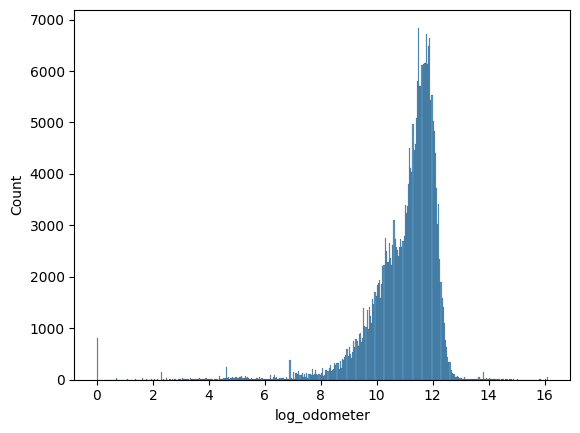

In [11]:
sns.histplot(df['odometer'])
plt.xlabel("log_odometer")
#Relatively normal now

Notice the outliers present in our log_odometer, prune them by iqr method

In [12]:
Q1 = df['odometer'].quantile(0.25)
Q3 = df['odometer'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [13]:
def transform2_2(df):
    df.drop(index=np.where((df['odometer']<lower_bound)|(df['odometer']>upper_bound))[0], inplace=True)
    df.reset_index(inplace=True, drop=True)
transform2_2(df)
process_pipeline.append(transform2_2)

<Axes: xlabel='year', ylabel='Count'>

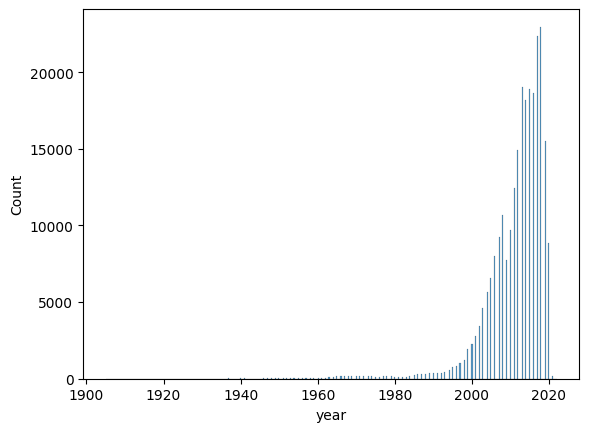

In [14]:
sns.histplot(df['year'])

Most cars were made between 2000-2020. Only keep the more recent cars, no reason to buy very old cars. Note that this also mean our final model will work as expected on more recent cars

In [15]:
def transform3(df):
    df.drop(index=np.where((df['year']<2000))[0], inplace=True)
    df.reset_index(inplace=True, drop=True)
transform3(df)
process_pipeline.append(transform3)

<Axes: xlabel='year', ylabel='Count'>

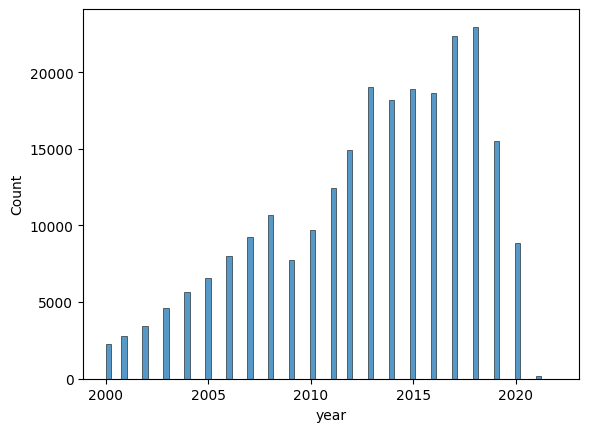

In [16]:
sns.histplot(df['year'])

<Axes: xlabel='lat', ylabel='Count'>

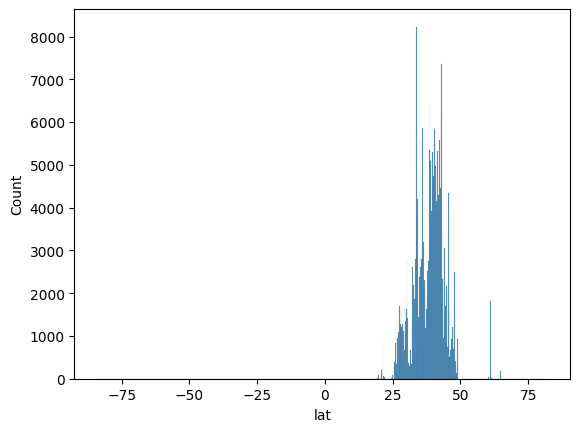

In [17]:
sns.histplot(df['lat'])

<Axes: xlabel='long', ylabel='Count'>

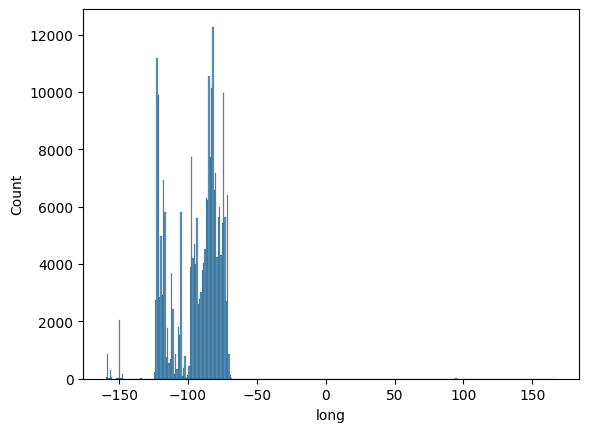

In [18]:
sns.histplot(df['long'])

Datapoints appear to be clustered around certain latitude and longitudes

In [19]:
#Extract year from posting_date
def transform4(df):
    df['posting_date'] =pd.to_datetime(df['posting_date'], utc=True).dt.year.astype("float64")
transform4(df)
process_pipeline.append(transform4)

In [20]:
df['posting_date'].unique()

array([2021.])

In [21]:
#All dates posted on the same year
#Maybe we can also find the age of the car

In [22]:
def transform5(df):
    df['car_age'] = df['posting_date']-df['year']
transform5(df)
process_pipeline.append(transform5)

<Axes: xlabel='car_age', ylabel='Count'>

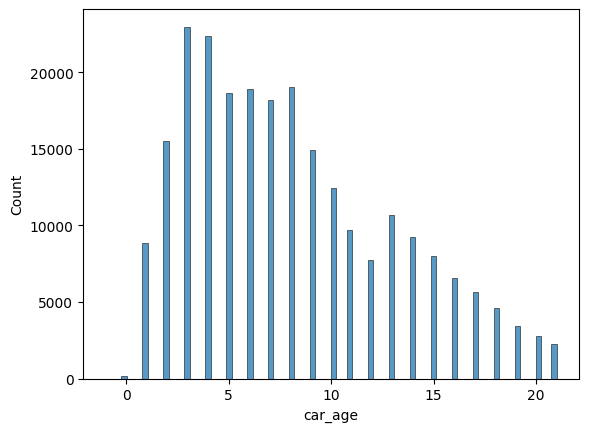

In [23]:
sns.histplot(df['car_age'])

Age of cars are relatively normally distributed, notice negative age due to year being after posting date, an error

In [24]:
#Drop negative age
def transform6(df):
    df.drop(index=np.where(df['car_age']<0)[0], inplace=True)
    df.reset_index(inplace=True, drop=True)
transform6(df)
process_pipeline.append(transform6)

In [25]:
df['car_age'].describe()

count    242697.000000
mean          8.171160
std           4.970978
min           0.000000
25%           4.000000
50%           7.000000
75%          12.000000
max          21.000000
Name: car_age, dtype: float64

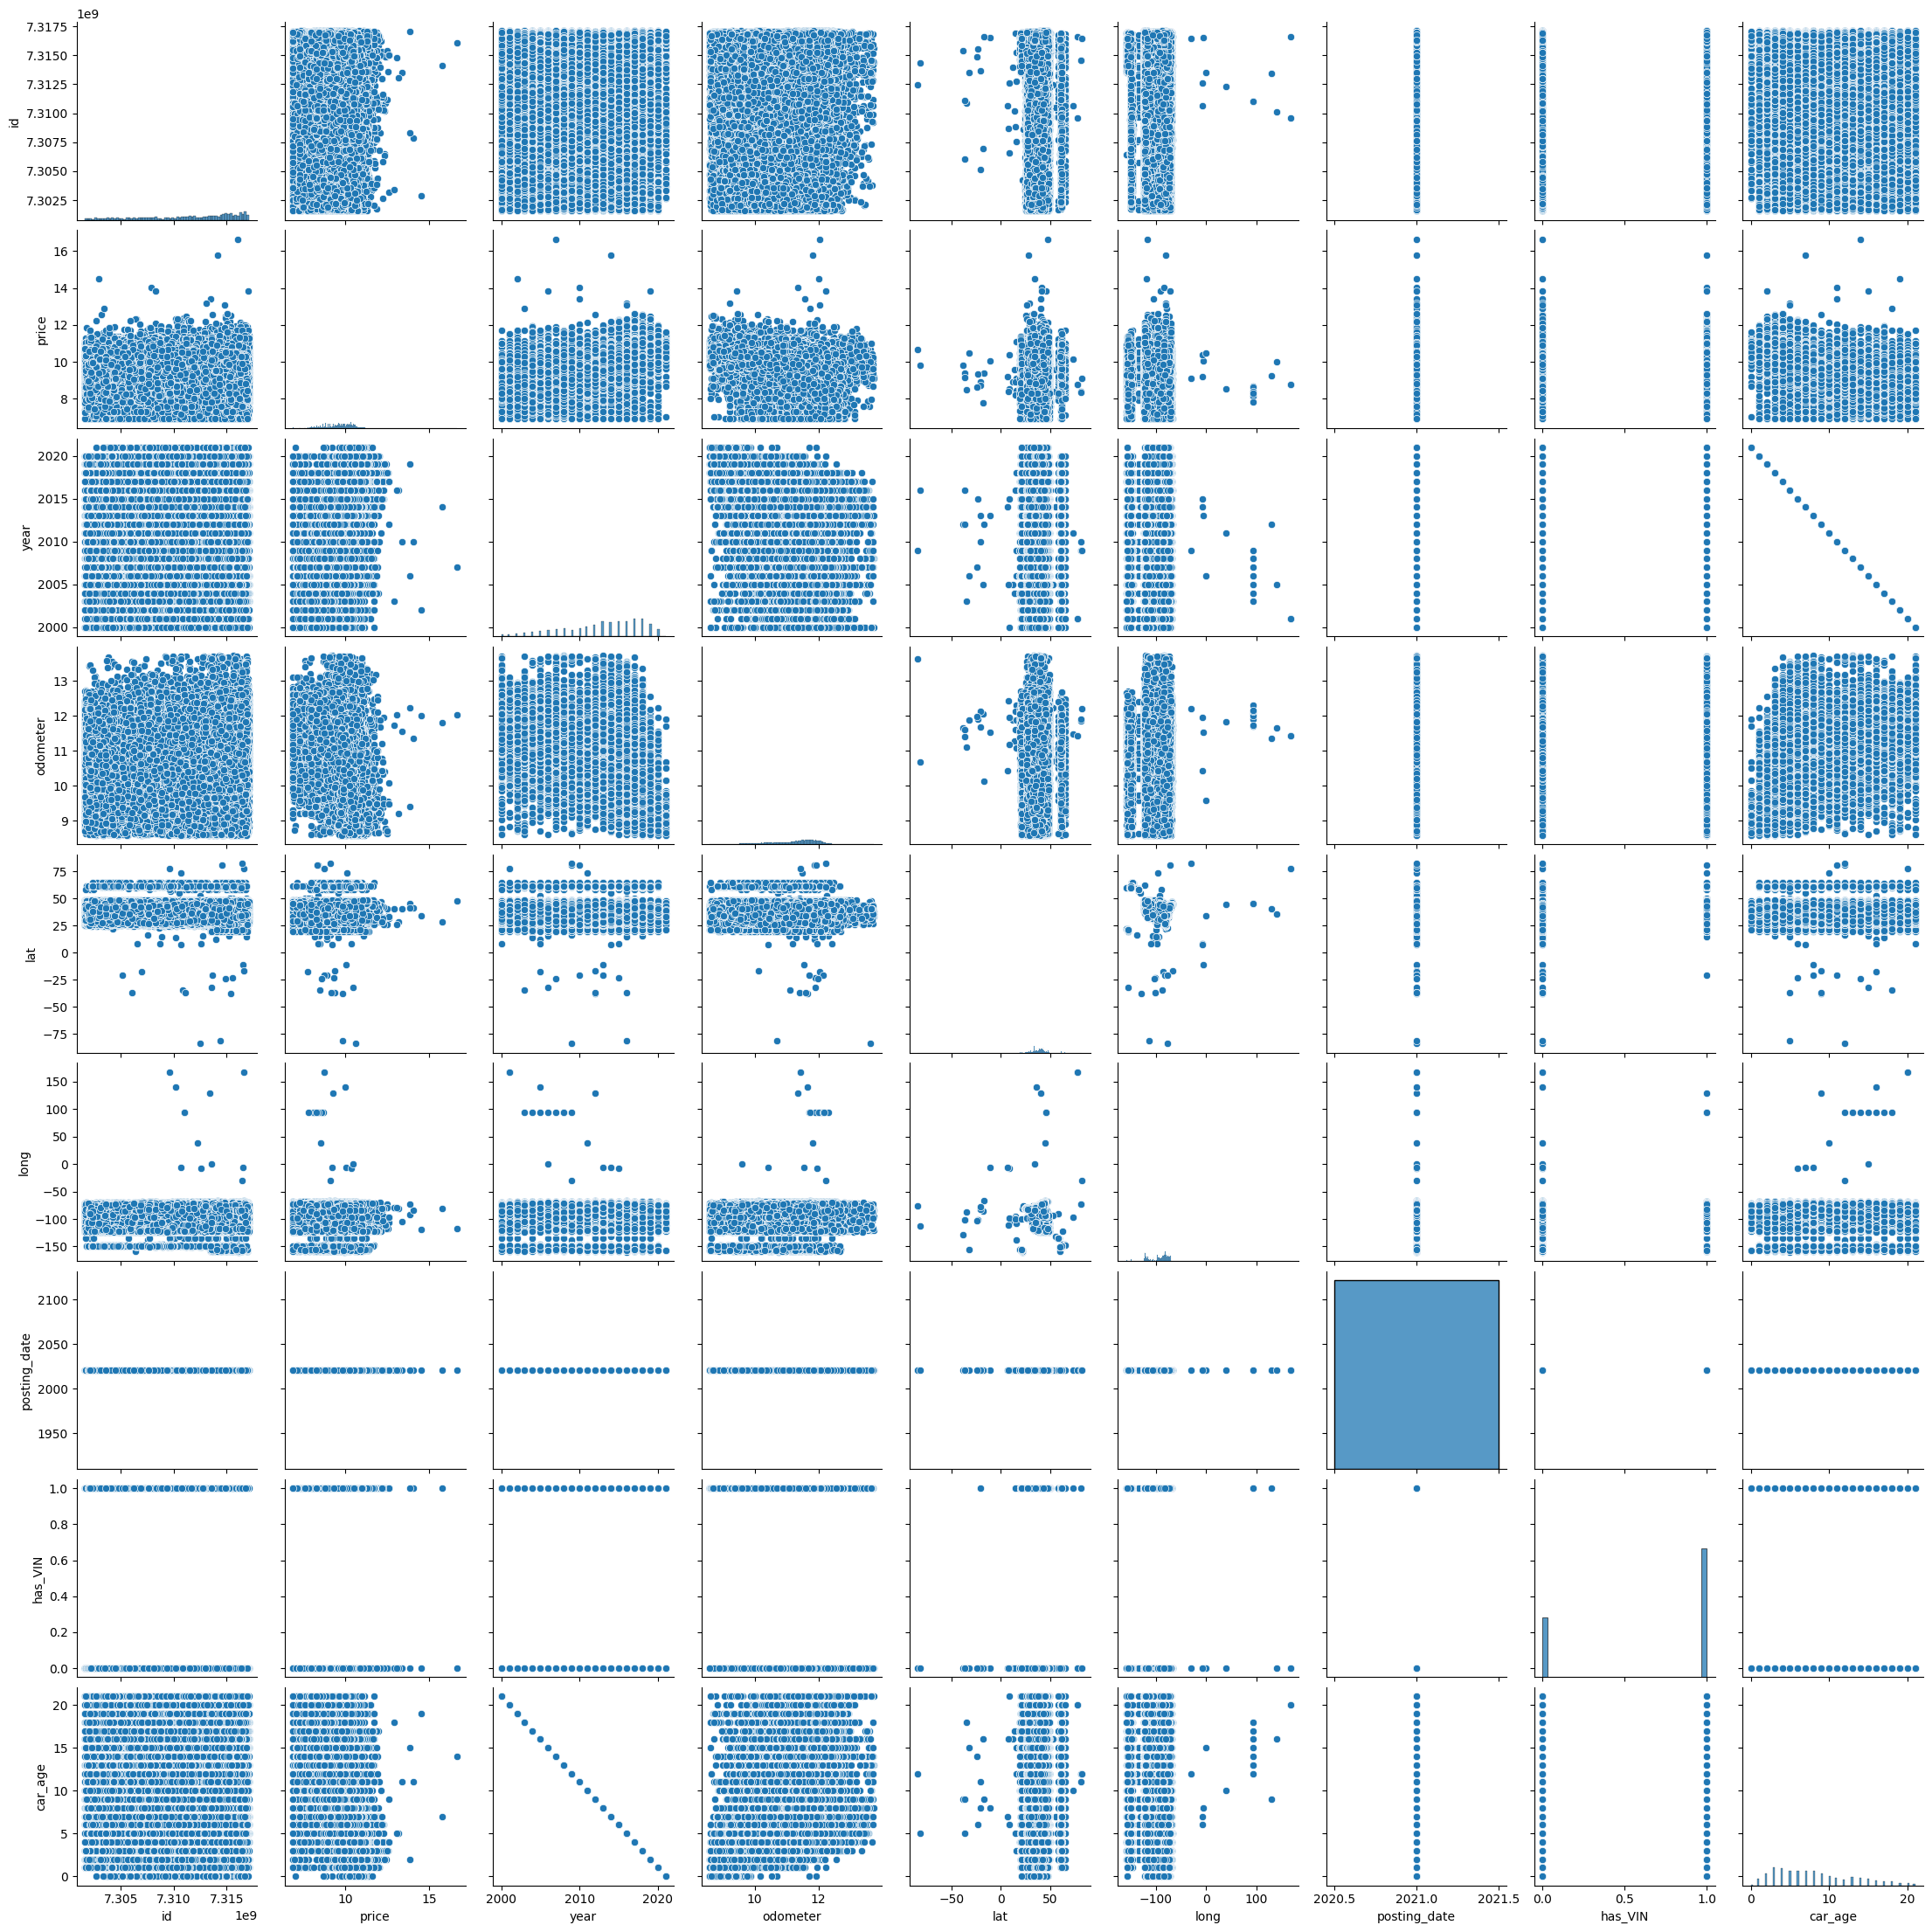

In [26]:
sns.pairplot(df.select_dtypes(np.number))

Text(0.5, 1.0, 'Pearson corr between numerical features')

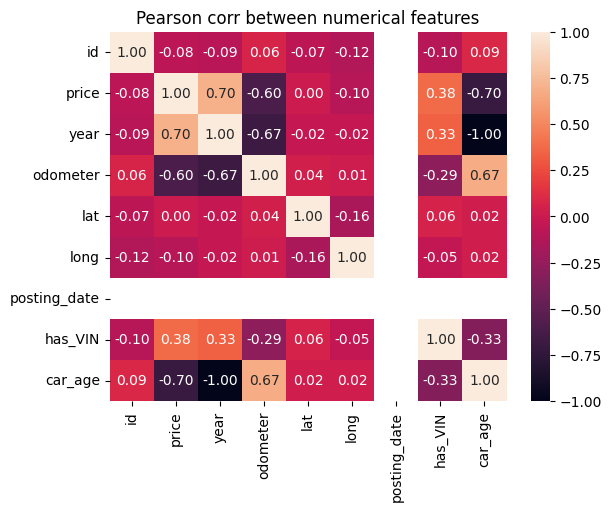

In [27]:
sns.heatmap(df.select_dtypes(np.number).corr(), annot=True, fmt='.2f')
plt.title("Pearson corr between numerical features")

## Explore categorical feature

In [28]:
df.select_dtypes(exclude=np.number).columns

Index(['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'drive', 'type', 'paint_color',
       'description', 'state'],
      dtype='object')

In [29]:
df['region'].value_counts()

region
columbus               2213
sarasota-bradenton     1995
grand rapids           1959
tampa bay area         1957
jacksonville           1934
                       ... 
southern WV              11
southwest MS             11
fort smith, AR            7
west virginia (old)       4
kansas city               3
Name: count, Length: 404, dtype: int64

404 unique regions, thats alot

In [30]:
df['state'].value_counts()

state
ca    27543
fl    16552
tx    12976
ny    11573
oh    10530
mi     8573
or     8157
pa     8144
nc     7347
wa     7331
wi     7294
tn     6685
co     6566
nj     6027
va     5562
id     5468
il     5390
az     5111
ia     5104
ma     4965
mn     4912
ga     3939
ks     3905
mt     3900
ok     3708
in     3675
sc     3303
ct     3229
al     2951
md     2897
ky     2679
mo     2533
ak     2390
nm     2283
nv     1975
dc     1814
ar     1811
nh     1804
la     1680
me     1551
vt     1486
ri     1481
hi     1314
sd      800
ut      733
wv      642
ms      641
de      594
ne      561
wy      341
nd      267
Name: count, dtype: int64

Location data by state might be more appropriate for usage to simplify our data, drop the region column

In [31]:
def transform7(df):
    df.drop(columns=['region'], inplace=True)
transform7(df)
process_pipeline.append(transform7)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 [Text(0, 0, 'ca'),
  Text(1, 0, 'fl'),
  Text(2, 0, 'tx'),
  Text(3, 0, 'ny'),
  Text(4, 0, 'oh'),
  Text(5, 0, 'mi'),
  Text(6, 0, 'or'),
  Text(7, 0, 'pa'),
  Text(8, 0, 'nc'),
  Text(9, 0, 'wa'),
  Text(10, 0, 'wi'),
  Text(11, 0, 'tn'),
  Text(12, 0, 'co'),
  Text(13, 0, 'nj'),
  Text(14, 0, 'va'),
  Text(15, 0, 'id'),
  Text(16, 0, 'il'),
  Text(17, 0, 'az'),
  Text(18, 0, 'ia'),
  Text(19, 0, 'ma'),
  Text(20, 0, 'mn'),
  Text(21, 0, 'ga'),
  Text(22, 0, 'ks'),
  Text(23, 0, 'mt'),
  Text(24, 0, 'ok'),
  Text(25, 0, 'in'),
  Text(26, 0, 'sc'),
  Text(27, 0, 'ct'),
  Text(28, 0, 'al'),
  Text(29, 0, 'md'),
  Text(30, 0, 'ky'),
  Text(31, 0, 'mo'),
  Text(32, 0, 'ak'),
  Text(33, 0, 'nm'),

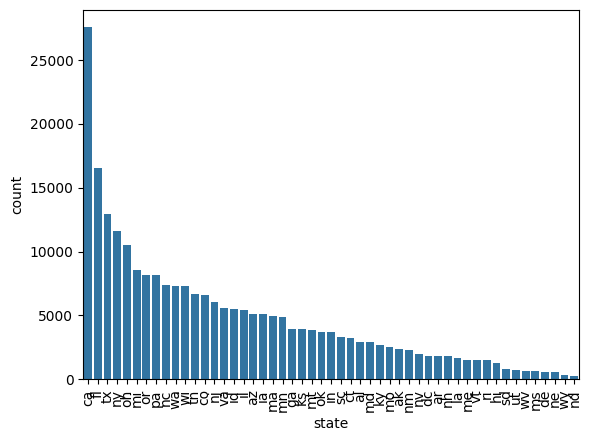

In [32]:
sns.barplot(df['state'].value_counts())
plt.xticks(rotation=90)

Most data in ca, corresponds with our clustered lat/long data

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 [Text(0, 0, 'tx'),
  Text(1, 0, 'ny'),
  Text(2, 0, 'pa'),
  Text(3, 0, 'in'),
  Text(4, 0, 'vt'),
  Text(5, 0, 'fl'),
  Text(6, 0, 'nm'),
  Text(7, 0, 'mi'),
  Text(8, 0, 'nj'),
  Text(9, 0, 'tn'),
  Text(10, 0, 'oh'),
  Text(11, 0, 'wi'),
  Text(12, 0, 'ca'),
  Text(13, 0, 'nc'),
  Text(14, 0, 'wa'),
  Text(15, 0, 'nd'),
  Text(16, 0, 'ut'),
  Text(17, 0, 'nh'),
  Text(18, 0, 'id'),
  Text(19, 0, 'or'),
  Text(20, 0, 'nv'),
  Text(21, 0, 'ks'),
  Text(22, 0, 'ia'),
  Text(23, 0, 'az'),
  Text(24, 0, 'ms'),
  Text(25, 0, 'ct'),
  Text(26, 0, 'il'),
  Text(27, 0, 'va'),
  Text(28, 0, 'md'),
  Text(29, 0, 'sd'),
  Text(30, 0, 'ok'),
  Text(31, 0, 'dc'),
  Text(32, 0, 'mn'),
  Text(33, 0, 'ak'),

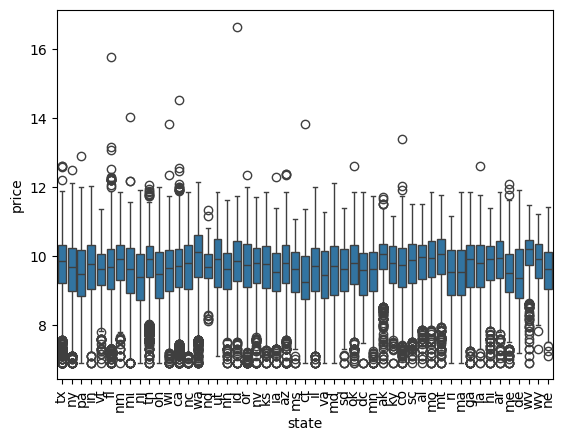

In [33]:
sns.boxplot(df, x='state', y='price')
plt.xticks(rotation=90)

Prices appear to vary betwen states

<Axes: xlabel='count', ylabel='fuel'>

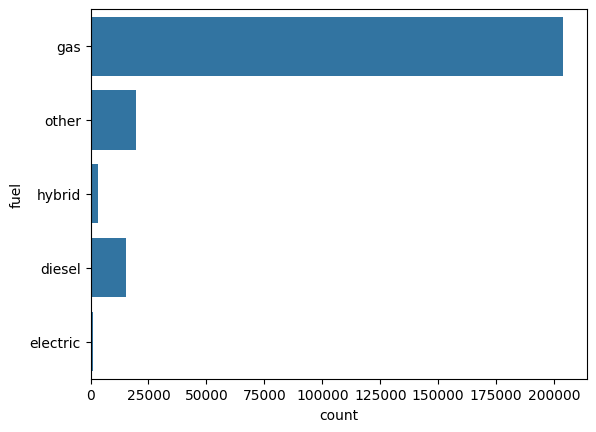

In [34]:
sns.countplot(df['fuel'])

Highly imbalanced electric and hybrid types

([0, 1, 2, 3, 4],
 [Text(0, 0, 'gas'),
  Text(1, 0, 'other'),
  Text(2, 0, 'hybrid'),
  Text(3, 0, 'diesel'),
  Text(4, 0, 'electric')])

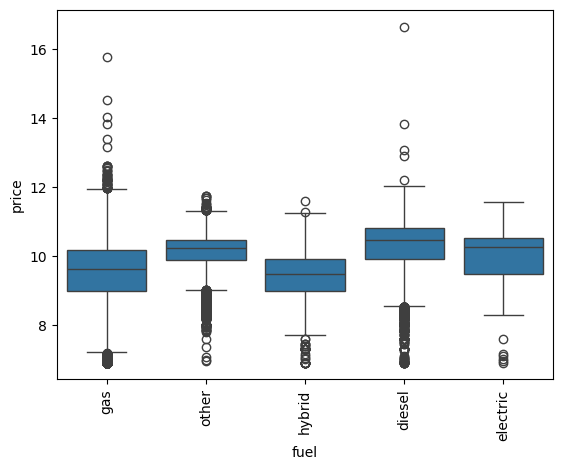

In [35]:
sns.boxplot(df, x='fuel', y='price')
plt.xticks(rotation=90)

Prices vary between fuel types

## Some feature engineering

We use data from https://www.kaggle.com/datasets/sergejnuss/united-states-cities-database 

Prices may vary depending on proximity to a major city due to need for travel, use traversine distance to account for curvature of the earth

In [36]:
from haversine import haversine
from tqdm import tqdm

In [37]:
#Import us city data
us_data = pd.read_csv("./uscities.csv")

In [38]:
us_data.sample(5)

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
21340,La Jara,La Jara,NM,New Mexico,35043,Sandoval,36.1055,-106.9418,325,8,polygon,False,False,America/Denver,3,87027,1840017744
2665,Albert Lea,Albert Lea,MN,Minnesota,27047,Freeborn,43.6547,-93.3642,17656,513,polygon,False,True,America/Chicago,3,56007,1840006824
6921,Woodruff,Woodruff,SC,South Carolina,45083,Spartanburg,34.7397,-82.0323,4642,436,polygon,False,True,America/New_York,3,29388,1840015484
2906,Bellevue,Bellevue,WI,Wisconsin,55009,Brown,44.4593,-87.9554,15944,429,polygon,False,True,America/Chicago,3,54311 54115,1840000308
11051,Richmond,Richmond,IL,Illinois,17111,McHenry,42.4639,-88.3093,1904,171,polygon,False,True,America/Chicago,3,60071,1840011138


In [39]:
#Map each state to a list of cities
us_city_map = {state:[((b[1]['lat'], b[1]['lng'])) for b in us_data[us_data['state_id']==state.upper()][['lat', 'lng']].iterrows()] for state in df['state'].unique()}

In [40]:
def transform7(df):
    distances = []
    for i in tqdm(df.iterrows(), total=df.shape[0], desc='Calculating dist'):
        state = i[1]['state']
        a = (i[1]['lat'], i[1]['long'])
        #Apply filter
        cities = us_city_map[state]
        distance = min([haversine(a, b) for b in cities])
        distances.append(distance)
    df['distance_to_city'] = distances
transform7(df)
process_pipeline.append(transform7)

Calculating dist: 100%|██████████| 242697/242697 [01:37<00:00, 2491.51it/s]


<Axes: xlabel='distance_to_city', ylabel='Count'>

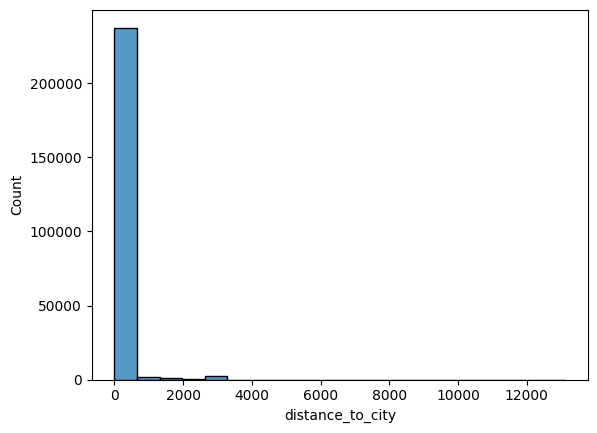

In [41]:
sns.histplot(df['distance_to_city'], bins=20)

More erronous values we got places being in antartica as seen from insane distance to city
Set upper bound to 3,639km length of alaska, the largest us state

In [42]:
def transform8(df):
    df.drop(index=np.where(df['distance_to_city']>=3639)[0], inplace=True)
    df.reset_index(inplace=True, drop=True)
transform8(df)
process_pipeline.append(transform8)

<Axes: xlabel='distance_to_city', ylabel='Count'>

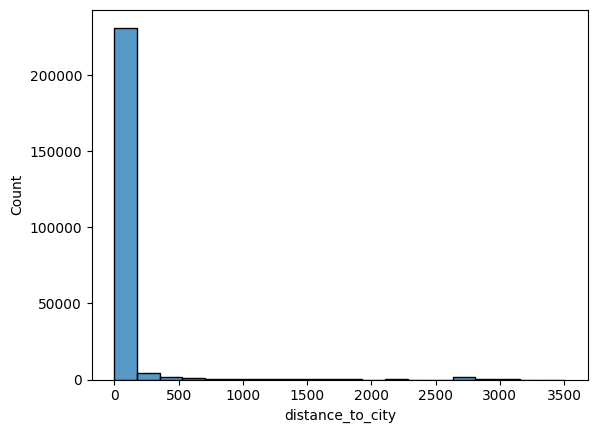

In [43]:
sns.histplot(df['distance_to_city'], bins=20)

<Axes: xlabel='distance_to_city', ylabel='price'>

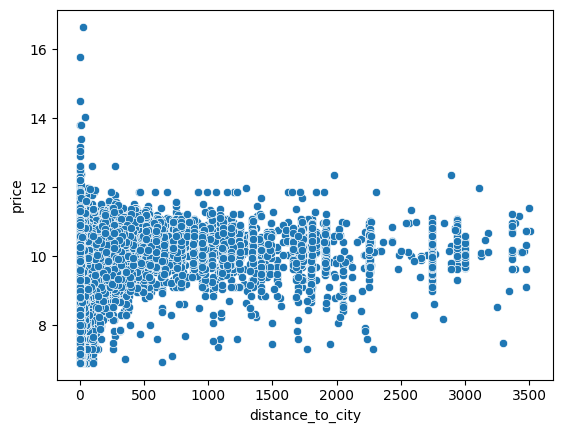

In [44]:
sns.scatterplot(data=df, x='distance_to_city', y='price')

Prices tend to be higher nearer to cities

## Scale our numerical data

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
def standard_scaler(df, scaler=None):
    from warnings import simplefilter
    simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
    numeric = df.select_dtypes(np.number)
    numeric = numeric.drop(columns=["id", "has_VIN", "lat", "long"])
    if scaler == None:
        scaler = StandardScaler()
        scaler.fit(numeric)
    data = scaler.transform(numeric)
    df[scaler.get_feature_names_out()] = data
    return scaler

In [47]:
scaler = standard_scaler(df)

In [48]:
import pickle
import os
if (not os.path.exists("./preprocessing")):
    os.mkdir("./preprocessing")
with open("./preprocessing/standard_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [49]:
def transform9(df):
    with open("./preprocessing/standard_scaler.pkl", "rb") as f:
        scaler = pickle.load(f)
    standard_scaler(df, scaler)

In [50]:
process_pipeline.append(transform9)

## Encode our categorical data to numeric

In [51]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [52]:
df.select_dtypes(exclude=np.number).columns

Index(['manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'drive', 'type', 'paint_color',
       'description', 'state'],
      dtype='object')

In [53]:
#Drop the textual information for simplicity
global_df = ["testval_text.csv", "train_text.csv"] 
def transform10(df):
    global global_df
    #Save a copy of textual data to work with later
    df[['id', 'description', 'price']].to_csv(global_df.pop(), index=False)
    df.drop(columns=['description'], inplace=True)
transform10(df)
process_pipeline.append(transform10)

In [54]:
#Drop model for simplicity
def transform11(df):
    df.drop(columns=['model'], inplace=True)
transform11(df)
process_pipeline.append(transform11)

In [55]:
def ohe(df, cols, encoder=None):
    from warnings import simplefilter
    simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
    df_c = df.copy()
    if encoder == None:
        encoder = OneHotEncoder()
        encoder.fit(df_c[cols])
    data = encoder.transform(df_c[cols])
    oh_df = pd.DataFrame(data.toarray(), columns=encoder.get_feature_names_out())
    df_c = df_c.join(oh_df)
    df_c.drop(columns=cols, inplace=True)
    df.drop(columns=cols, inplace=True)
    df[df_c.columns] = df_c
    return encoder

In [56]:
encoder = ohe(df, df.select_dtypes(exclude=np.number).columns)

In [57]:
with open("./preprocessing/ohe.pkl", "wb") as f:
    pickle.dump(encoder, f)

In [58]:
def transform12(df):
    with open("./preprocessing/ohe.pkl", "rb") as f:
        encoder = pickle.load(f)
    ohe(df, df.select_dtypes(exclude=np.number).columns, encoder)
process_pipeline.append(transform12)

In [59]:
#Drop unused columns, year, lat, long, posting_date. year and posting date are dropped since it is represented by new column car_age
#keep id column so we can merge data later
def transform13(df):
    df.drop(columns=["lat", "long", "posting_date"], inplace=True)
transform13(df)
process_pipeline.append(transform13)

In [60]:
process_pipeline

[<function __main__.transform1(df)>,
 <function __main__.transform2(df)>,
 <function __main__.transform2_2(df)>,
 <function __main__.transform3(df)>,
 <function __main__.transform4(df)>,
 <function __main__.transform5(df)>,
 <function __main__.transform6(df)>,
 <function __main__.transform7(df)>,
 <function __main__.transform7(df)>,
 <function __main__.transform8(df)>,
 <function __main__.transform9(df)>,
 <function __main__.transform10(df)>,
 <function __main__.transform11(df)>,
 <function __main__.transform12(df)>,
 <function __main__.transform13(df)>]

In [61]:
df_testval = pd.read_csv("./half_cleaned_vehicles_testvalset.csv")

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
for process in process_pipeline:
    process(df_testval)

Calculating dist: 100%|██████████| 60596/60596 [00:24<00:00, 2475.15it/s]


In [64]:
test, val = train_test_split(df_testval, test_size=0.5, random_state=42)

In [65]:
df.to_csv("train.csv", index=False)

In [66]:
val.to_csv("val.csv", index=False)

In [67]:
test.to_csv("test.csv", index=False)